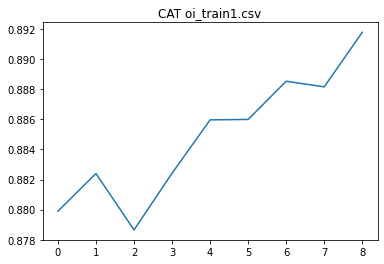

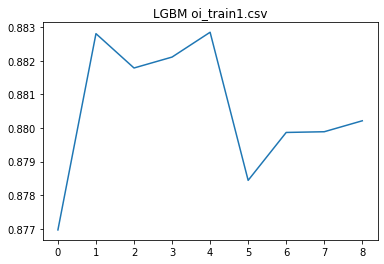

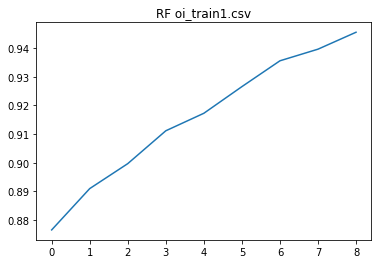

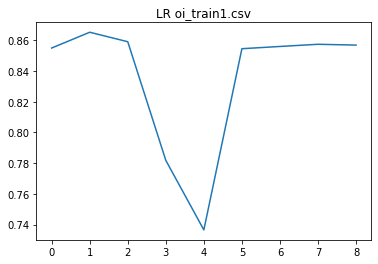

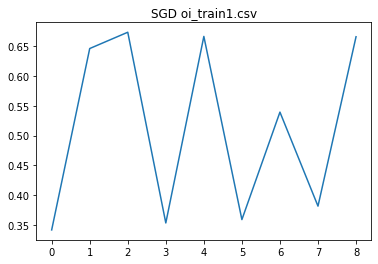

KeyboardInterrupt: 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

models = [CatBoostClassifier(verbose = False), LGBMClassifier(), RandomForestClassifier(), LogisticRegression(solver = "liblinear"), SGDClassifier(loss = "modified_huber")]
model_name = ["CAT ", "LGBM ", "RF ", "LR ", "SGD "]
for l1 in ["o", "v"]:
    for l2 in ["i", "b", "f"]:
        for n in range(1, 5):
            DATA_PATH = l1 + l2 + "_train" + str(n) + ".csv"
            df = pd.read_csv(DATA_PATH)
            df_zero = df[df["target"] == 0]; df_one = df[df["target"] == 1]
            idx = 0
            for model in models: 
                res = []
                for i in range(1, 10):
                    _len = int(len(df) * 0.1 * i)
                    a, b = int(_len * (len(df_zero) /(len(df_zero) + len(df_one)))), int(_len * (len(df_one) /(len(df_zero) + len(df_one))))
                    sub_zero = df_zero.sample(n = a, replace = True)
                    sub_one = df_one.sample(n = b, replace = True)
                    sub = pd.concat([sub_zero, sub_one], axis = 0)
                    sub = sub.sample(frac = 1)

                    X, y = sub.drop(["target"], axis = 1), sub["target"]
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
                    model.fit(X_train, y_train)
                    score1 = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
                    score2 = accuracy_score(y_test, model.predict(X_test))
                    res.append((score1 + score2) / 2) 

                plt.plot(res)
                plt.title(model_name[idx] + DATA_PATH)
                plt.show()
                idx += 1